In [22]:
!pip install tensorflow


In [50]:
# Step 1: Import Required Libraries
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Sklearn for preprocessing and train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


In [51]:
# Step 2: Load CIFAR-10 Dataset
# ----------------------------
# CIFAR-10 dataset has 60,000 images of size 32x32x3 in 10 classes
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Optional: use smaller subset for faster training
X_train, y_train = X_train[:10000], y_train[:10000]
X_test, y_test = X_test[:2000], y_test[:2000]

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
Training data shape: (10000, 32, 32, 3) (10000, 1)
Testing data shape: (2000, 32, 32, 3) (2000, 1)


In [52]:
# Step 3: Preprocess Data
# ----------------------------
# Normalize pixel values to [0,1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split training set into train + validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)


Train set: (8000, 32, 32, 3) (8000, 10)
Validation set: (2000, 32, 32, 3) (2000, 10)


In [53]:
# Step 4: Define CNN Model Architecture
# ----------------------------
model = Sequential()

# Input layer (modern Keras style)
model.add(Input(shape=(32, 32, 3)))

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Flatten feature maps to feed into Dense layers
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting

# Output layer for 10 classes
model.add(Dense(num_classes, activation='softmax'))

In [54]:
# Step 5: Compile the Model
# ----------------------------
model.compile(
    optimizer='adam',                    # Adaptive optimizer
    loss='categorical_crossentropy',     # Multi-class classification loss
    metrics=['accuracy']                 # Track training/validation accuracy
)

# Display model architecture
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Step 6: Train the CNN Model
# ----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,             # Number of training passes
    batch_size=64,         # Number of samples per gradient update
    verbose=1
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.2327 - loss: 2.0479 - val_accuracy: 0.3700 - val_loss: 1.7299
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.3441 - loss: 1.7613 - val_accuracy: 0.4530 - val_loss: 1.5439
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.3977 - loss: 1.6189 - val_accuracy: 0.4830 - val_loss: 1.4374
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.4431 - loss: 1.5144 - val_accuracy: 0.4660 - val_loss: 1.4854
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.4765 - loss: 1.4263 - val_accuracy: 0.5300 - val_loss: 1.3278
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.5101 - loss: 1.3379 - val_accuracy: 0.5600 - val_loss: 1.2376
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.5350 - loss: 1.2626 - val_accuracy: 0.5665 - val_loss: 1.1920
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.5609 - loss: 1.2106 - val_acc

In [58]:
# Step 7: Evaluate Model on Test Data
# ----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("✅ Test Accuracy:", round(test_acc * 100, 2), "%")
print("Test Loss:", round(test_loss, 4))


✅ Test Accuracy: 60.4 %
Test Loss: 1.1416


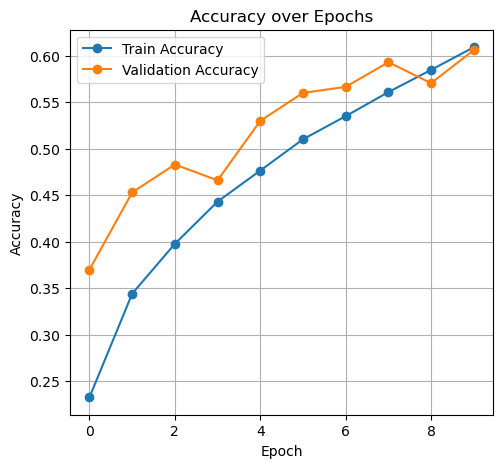

In [59]:
# Step 8: Plot Training History
# ----------------------------
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

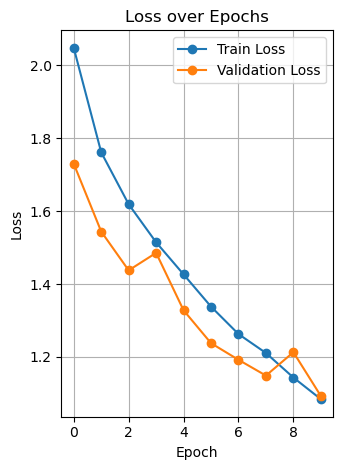

In [60]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


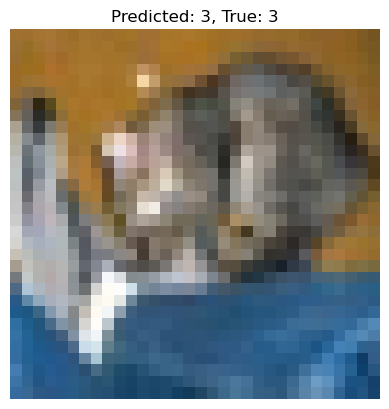

In [61]:
# Step 9: Make Predictions
# ----------------------------
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot labels back to integers
y_true = np.argmax(y_test, axis=1)

# Example: Display first test image and predicted class
plt.imshow(X_test[0])
plt.title(f"Predicted: {predicted_classes[0]}, True: {y_true[0]}")
plt.axis('off')
plt.show()

In [62]:
# Step 10: Classification Report
# ----------------------------
print("Classification Report:\n")
print(classification_report(y_true, predicted_classes, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.6269    0.6173    0.6221       196
           1     0.6299    0.8081    0.7080       198
           2     0.4335    0.4513    0.4422       195
           3     0.4332    0.4070    0.4197       199
           4     0.5608    0.4192    0.4798       198
           5     0.4968    0.4162    0.4529       185
           6     0.6680    0.7454    0.7046       216
           7     0.7253    0.6839    0.7040       193
           8     0.7378    0.7650    0.7511       217
           9     0.6557    0.6847    0.6699       203

    accuracy                         0.6040      2000
   macro avg     0.5968    0.5998    0.5954      2000
weighted avg     0.5994    0.6040    0.5988      2000

